# MMI reflector

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import meep as mp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Define the system
# parameters for 1220nm
sm_width = .35  # um
wavelength = 1.22  # um
frequency = 1 / 1.22
MMI_width = 4.45
MMI_length = 8

cell = mp.Vector3(16, 8, 0)

geometry = [mp.Block(mp.Vector3(cell.x / 2, sm_width, 1e20),
                     center=mp.Vector3(-cell.x / 4, 0),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(MMI_length, MMI_width, 1e20),
                     center=mp.Vector3(MMI_length / 2, 0),
                     material=mp.Medium(epsilon=12)),
#             mp.Prism([mp.Vector3(MMI_length, MMI_width / 2),
#                       mp.Vector3(MMI_length, -MMI_width / 2),
#                       mp.Vector3(MMI_length + MMI_width, 0),
#                      ], 
#                      height=0, material=mp.Medium(epsilon=12)),
           ]

# this should be replaced by an eigenmode
sources = [mp.Source(mp.ContinuousSource(frequency=frequency, width=20),
                     component=mp.Ez,
                     center=mp.Vector3(-cell.x / 2, 0),
                     size=mp.Vector3(0, sm_width))]

pml_layers = [mp.PML(1.0)]

resolution = 10

-----------
Initializing structure...
run 0 finished at t = 1.0 (20 timesteps)


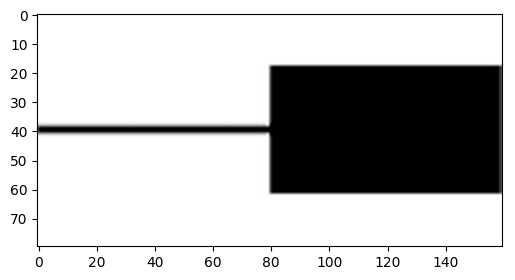

In [3]:
# Do the simulation, and verify the geometry
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
def verify_geometry():
    sim.run(until=1)
    eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
    plt.figure(dpi=100)
    plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
verify_geometry()

run 3 finished at t = 61.0 (1220 timesteps)


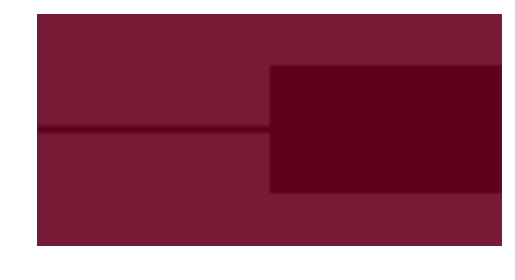

In [6]:
def plot_sim(until=200):
#     sim.reset_meep()
    sim.run(until=until)
    eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
    ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
    plt.figure(dpi=100)
    plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
    plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.axis('off')
plot_sim(20)